<h2>1.IMPORTING THE REQUIRED PACKAGES</h2>

In [91]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

D:\anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


<h2>2.Loading the dataset.</h2>

In [57]:
data=pd.read_csv("C:\Users\Thareni\Downloads\abalone.csv")

In [58]:
data.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [59]:
data.rename(columns={'Whole weight':'Whole_weight','Shucked weight':'Shucked_weight','Viscera weight':'Viscera_weight','Shell weight':'Shell_weight'}, inplace=True,)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


<h2>3.Data Visualizations.</h2>

<AxesSubplot:xlabel='Sex', ylabel='count'>

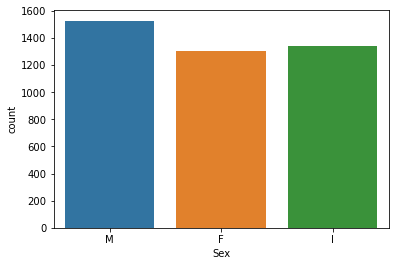

In [61]:
sns.countplot(x="Sex",data=data)

<AxesSubplot:>

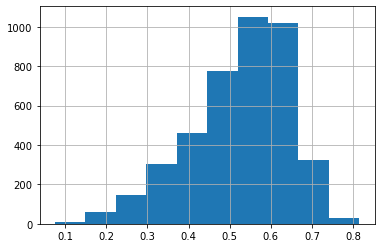

In [62]:
data.Length.hist()

<AxesSubplot:>

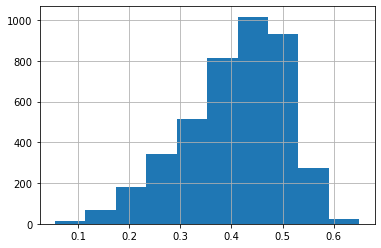

In [63]:
data.Diameter.hist()

<AxesSubplot:>

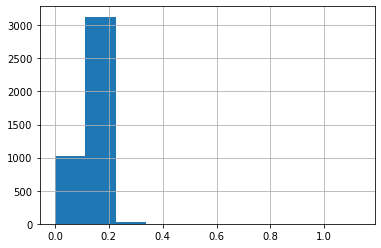

In [64]:
data.Height.hist()

<AxesSubplot:>

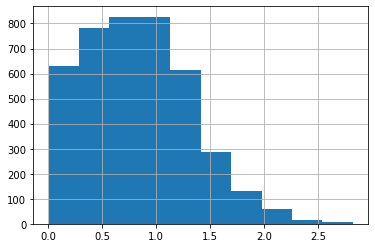

In [65]:
data.Whole_weight.hist()

<AxesSubplot:>

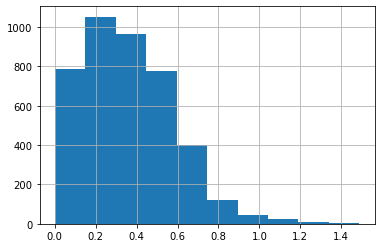

In [66]:
data.Shucked_weight.hist()

<AxesSubplot:>

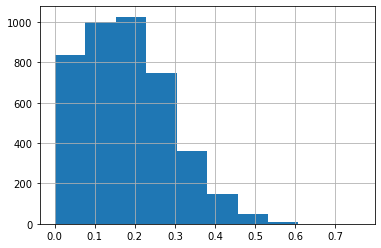

In [67]:
data.Viscera_weight.hist()

<AxesSubplot:>

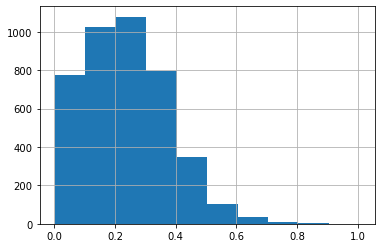

In [68]:
data.Shell_weight.hist()

<AxesSubplot:>

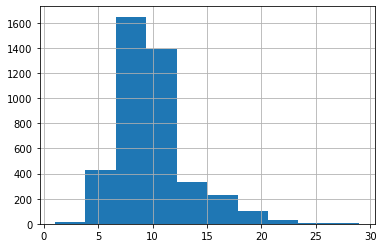

In [69]:
data.Rings.hist()

<h2>4. Missing values</h2>

In [70]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

<h2> 5.Outliers</h2>

In [71]:
Q1=data.Length.quantile(0.25)
Q3=data.Length.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
data.Length[data.Length>UE]=UE
data.Length[data.Length<LE]=LE

C:\Users\Jothy Natarajan\AppData\Local\Temp\ipykernel_12824\3356514366.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Length[data.Length>UE]=UE
C:\Users\Jothy Natarajan\AppData\Local\Temp\ipykernel_12824\3356514366.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Length[data.Length<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x2b6f7e27220>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6f7e277f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6f7e19f10>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6f7e27d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6f7e340a0>],
 'means': []}

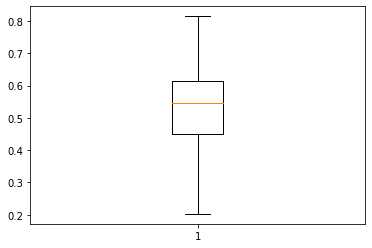

In [72]:
plt.boxplot(data.Length)

In [73]:
Q1=data.Diameter.quantile(0.25)
Q3=data.Diameter.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
data.Diameter[data.Diameter>UE]=UE
data.Diameter[data.Diameter<LE]=LE

C:\Users\Jothy Natarajan\AppData\Local\Temp\ipykernel_12824\2737836973.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Diameter[data.Diameter>UE]=UE
C:\Users\Jothy Natarajan\AppData\Local\Temp\ipykernel_12824\2737836973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Diameter[data.Diameter<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x2b6f7e880d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6f7e88670>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6f7e79d90>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6f7e88c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6f7e88ee0>],
 'means': []}

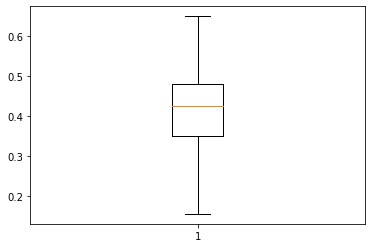

In [74]:
plt.boxplot(data.Diameter)

In [75]:
Q1=data.Height.quantile(0.25)
Q3=data.Height.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
data.Height[data.Height>UE]=UE
data.Height[data.Height<LE]=LE

C:\Users\Jothy Natarajan\AppData\Local\Temp\ipykernel_12824\2763030126.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Height[data.Height>UE]=UE
C:\Users\Jothy Natarajan\AppData\Local\Temp\ipykernel_12824\2763030126.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Height[data.Height<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x2b6f8eb07f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6f8eb0dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6f8eb0520>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6f8ec03a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6f8ec0670>],
 'means': []}

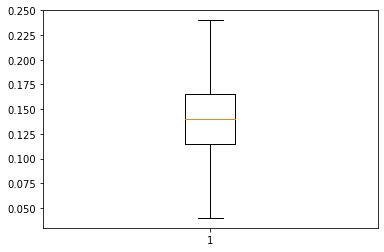

In [76]:
plt.boxplot(data.Height)

In [77]:
Q1=data.Whole_weight.quantile(0.25)
Q3=data.Whole_weight.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
data.Whole_weight[data.Whole_weight>UE]=UE
data.Whole_weight[data.Whole_weight<LE]=LE

C:\Users\Jothy Natarajan\AppData\Local\Temp\ipykernel_12824\3096764518.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Whole_weight[data.Whole_weight>UE]=UE
C:\Users\Jothy Natarajan\AppData\Local\Temp\ipykernel_12824\3096764518.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Whole_weight[data.Whole_weight<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x2b6f8f1f460>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6f8f1fa30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6f8f1f190>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6f8f1ffd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6f8f2b2e0>],
 'means': []}

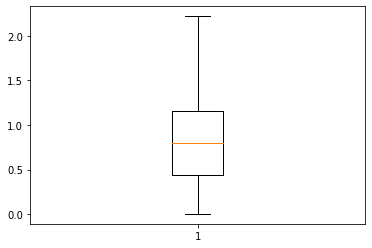

In [78]:
plt.boxplot(data.Whole_weight)

In [79]:
Q1=data.Shucked_weight.quantile(0.25)
Q3=data.Shucked_weight.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
data.Shucked_weight[data.Shucked_weight>UE]=UE
data.Shucked_weight[data.Shucked_weight<LE]=LE

C:\Users\Jothy Natarajan\AppData\Local\Temp\ipykernel_12824\2890993447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Shucked_weight[data.Shucked_weight>UE]=UE
C:\Users\Jothy Natarajan\AppData\Local\Temp\ipykernel_12824\2890993447.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Shucked_weight[data.Shucked_weight<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x2b6f8f74fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6f8f83580>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6f8f74ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6f8f83b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6f8f83df0>],
 'means': []}

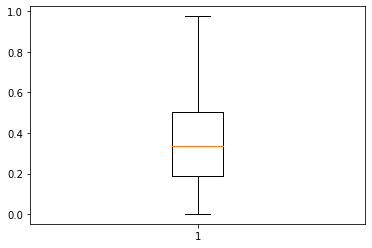

In [80]:
plt.boxplot(data.Shucked_weight)

In [81]:
Q1=data.Viscera_weight.quantile(0.25)
Q3=data.Viscera_weight.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
data.Viscera_weight[data.Viscera_weight>UE]=UE
data.Viscera_weight[data.Viscera_weight<LE]=LE

C:\Users\Jothy Natarajan\AppData\Local\Temp\ipykernel_12824\3200839427.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Viscera_weight[data.Viscera_weight>UE]=UE
C:\Users\Jothy Natarajan\AppData\Local\Temp\ipykernel_12824\3200839427.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Viscera_weight[data.Viscera_weight<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x2b6f8fd7e80>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6f8fe9460>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6f8fd7bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6f8fe9a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6f8fe9cd0>],
 'means': []}

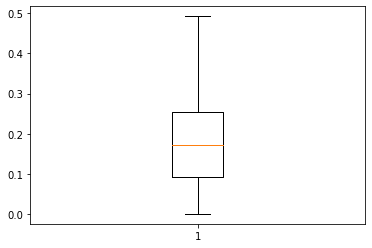

In [82]:
plt.boxplot(data.Viscera_weight)

In [83]:
Q1=data.Shell_weight.quantile(0.25)
Q3=data.Shell_weight.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
data.Shell_weight[data.Shell_weight>UE]=UE
data.Shell_weight[data.Shell_weight<LE]=LE

C:\Users\Jothy Natarajan\AppData\Local\Temp\ipykernel_12824\3426380620.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Shell_weight[data.Shell_weight>UE]=UE
C:\Users\Jothy Natarajan\AppData\Local\Temp\ipykernel_12824\3426380620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Shell_weight[data.Shell_weight<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x2b6f903be80>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6f904c490>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6f903bbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6f904ca30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6f904cd00>],
 'means': []}

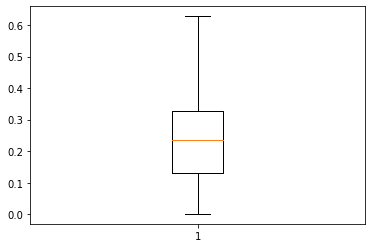

In [84]:
plt.boxplot(data.Shell_weight)

In [85]:
Q1=data.Rings.quantile(0.25)
Q3=data.Rings.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
data.Rings[data.Rings>UE]=UE
data.Rings[data.Rings<LE]=LE

C:\Users\Jothy Natarajan\AppData\Local\Temp\ipykernel_12824\3178562733.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Rings[data.Rings>UE]=UE


{'whiskers': [<matplotlib.lines.Line2D at 0x2b6f90ae4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6f90aea60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6f90ae1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6f90ba040>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6f90ba310>],
 'means': []}

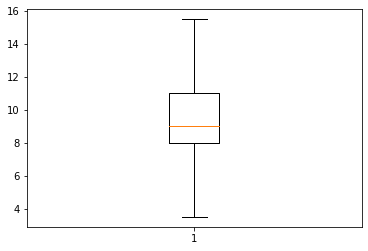

In [86]:
plt.boxplot(data.Rings)

<h3> Categorical columns and perform encoding</h3>

In [87]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
data['Sex']= label_encoder.fit_transform(data['Sex'])

<h3>Splitting the data
into dependent and independent variables</h3>

In [94]:
y=data.Rings
x=data.drop(['Rings'], axis = 1)

<h3> Scaling the independent variable</h3>

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(x)
scaled_data=scaler.transform(x)
x= pd.DataFrame(scaled_data)

In [96]:
x.head(5)

,0,1,2,3,4,5,6,7
0,1.0,0.412245,0.424242,0.275,0.230813,0.229231,0.204372,0.237220
1,1.0,0.240816,0.222222,0.250,0.100755,0.101026,0.097611,0.109425
2,0.0,0.534694,0.535354,0.475,0.304294,0.262051,0.286731,0.333067
3,1.0,0.387755,0.424242,0.425,0.231714,0.220000,0.230808,0.245208
4,0.5,0.208163,0.202020,0.200,0.091514,0.090769,0.079309,0.085463


<h3>Splitting the data into training and testing</h3>

In [97]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size = 0.8, test_size = 0.2,random_state =42)  

<h3>Building and Training the Model</h3>

In [99]:
#GradientBoostingRegressor
model=GradientBoostingRegressor(n_estimators=100,max_depth=2).fit(x_train,y_train)
y_predicted=model.predict(x_test)

<h3>Testing the Model</h3>

In [100]:
model.score(x_train,y_train)

0.6204392397518557

In [101]:
model.score(x_test,y_test)

0.5946899497113489

In [102]:
mean_squared_error(y_test,y_predicted,squared=False)

1.7798333801205748